# Recurrent Neural Network - LSTM -  Weekly

### Importing Libraries

In [28]:
import _pickle as pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("ggplot")
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional

### Loading the Data

In [3]:
with open("week_df.pkl", "rb") as fp:
    df = pickle.load(fp)

## Preprocessing Data

### Functions to prepare the data for LSTM

In [4]:
def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the univariate time sequence
    """
    X, y = [], []
    
    for i in range(len(seq)):
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        if out_end > len(seq):
            break
        
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [5]:
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history
    plt.figure(figsize=(12,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

### Splitting the Data

In [48]:
# How many periods looking back to predict
n_per_in  = 4

# How many periods to predict
n_per_out = 12

# Features (in this case it's 1 because there is only one feature: price)
n_features = 1

# Splitting the data into appropriate sequences
X, y = split_sequence(list(df.Close), n_per_in, n_per_out)

# Reshaping the X variable from 2D to 3D
X = X.reshape((X.shape[0], X.shape[1], n_features))


## Modeling - LSTM (RNN)

### Creating the Neural Network

In [49]:
# Instatiating the model
model = Sequential()

# Activation
activ = "tanh"

# Input layer
model.add(LSTM(50, activation=activ, return_sequences=True, input_shape=(n_per_in, n_features)))

# Hidden layers
for _ in range(25):
    model.add(LSTM(20, activation=activ, return_sequences=True))
    
# Final Hidden Layer
model.add(LSTM(10, activation=activ))

# Output layer
model.add(Dense(n_per_out))

# Model summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_129 (LSTM)              (None, 4, 50)             10400     
_________________________________________________________________
lstm_130 (LSTM)              (None, 4, 20)             5680      
_________________________________________________________________
lstm_131 (LSTM)              (None, 4, 20)             3280      
_________________________________________________________________
lstm_132 (LSTM)              (None, 4, 20)             3280      
_________________________________________________________________
lstm_133 (LSTM)              (None, 4, 20)             3280      
_________________________________________________________________
lstm_134 (LSTM)              (None, 4, 20)             3280      
_________________________________________________________________
lstm_135 (LSTM)              (None, 4, 20)            

In [50]:
# Compiling the data with specifications
model.compile(optimizer='adamax', loss='mse', metrics=['accuracy'])

### Fitting and Training the RNN

In [51]:
res = model.fit(X, y, epochs=10, batch_size=1, validation_split=0.05)

Train on 935 samples, validate on 50 samples
Epoch 1/10
935/935 [==============================] - 71s 76ms/step - loss: 114.6735 - accuracy: 0.0631 - val_loss: 435.3143 - val_accuracy: 0.0600
Epoch 2/10
935/935 [==============================] - 54s 58ms/step - loss: 73.5475 - accuracy: 0.0631 - val_loss: 337.6715 - val_accuracy: 0.0600
Epoch 3/10
935/935 [==============================] - 55s 58ms/step - loss: 62.7125 - accuracy: 0.0631 - val_loss: 292.5755 - val_accuracy: 0.0600
Epoch 4/10
935/935 [==============================] - 56s 59ms/step - loss: 60.0375 - accuracy: 0.0631 - val_loss: 271.0481 - val_accuracy: 0.0600
Epoch 5/10
935/935 [==============================] - 53s 56ms/step - loss: 59.4028 - accuracy: 0.0578 - val_loss: 262.1492 - val_accuracy: 0.1000
Epoch 6/10
935/935 [==============================] - 52s 56ms/step - loss: 59.2695 - accuracy: 0.0631 - val_loss: 259.2787 - val_accuracy: 0.1400
Epoch 7/10
935/935 [==============================] - 56s 60ms/step - lo

### Plotting the Accuracy and Loss

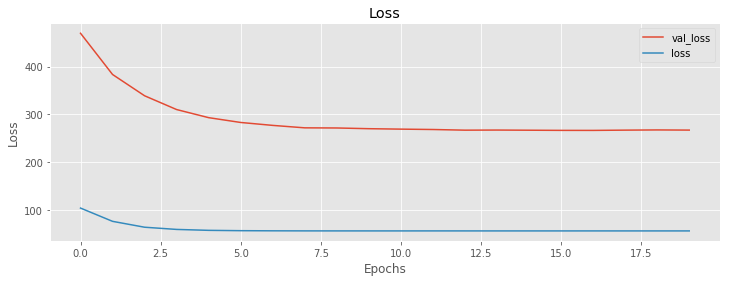

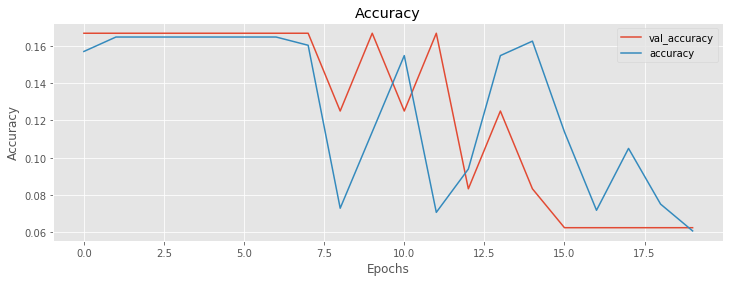

In [45]:
visualize_training_results(res)

### Visualizing the Predictions

#### Plotting the difference between the Actual closing prices and the Predicted prices

Predicted:
 [10.078672409057617, 10.07386589050293, 10.067185401916504, 10.074029922485352, 10.090058326721191, 10.075676918029785, 10.08069896697998, 10.072818756103516, 10.066116333007812, 10.0676851272583, 10.060781478881836, 10.050080299377441]

Actual:
 [28.219998999999998, 27.959999, 27.5, 26.440001000000002, 27.41, 32.41, 30.360001, 29.1, 30.370001000000002, 31.5, 33.209998999999996, 32.509997999999996]


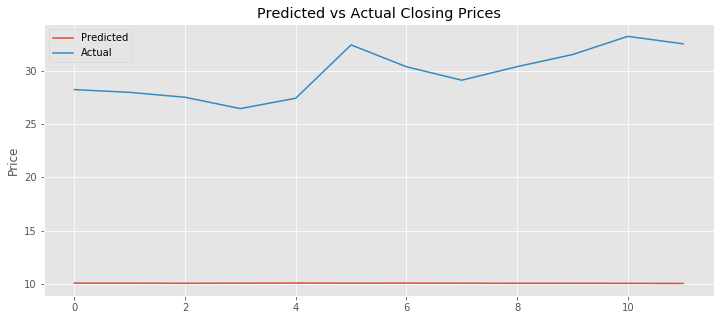

In [46]:
plt.figure(figsize=(12,5))
# Getting predictions
yhat = model.predict(X[-n_per_out].reshape(1, n_per_in, n_features)).tolist()[0]

# Printing and plotting those predictions
print("Predicted:\n", yhat)
plt.plot(yhat, label='Predicted')

# Printing and plotting the actual values
print("\nActual:\n", y[-n_per_out].tolist())
plt.plot(y[-n_per_out].tolist(), label='Actual')

plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.show()

#### Predicting/Forecasting the future prices

Predicted Prices:
 [10.078672409057617, 10.07386589050293, 10.067185401916504, 10.074029922485352, 10.090058326721191, 10.075676918029785, 10.08069896697998, 10.072818756103516, 10.066116333007812, 10.0676851272583, 10.060781478881836, 10.050080299377441]


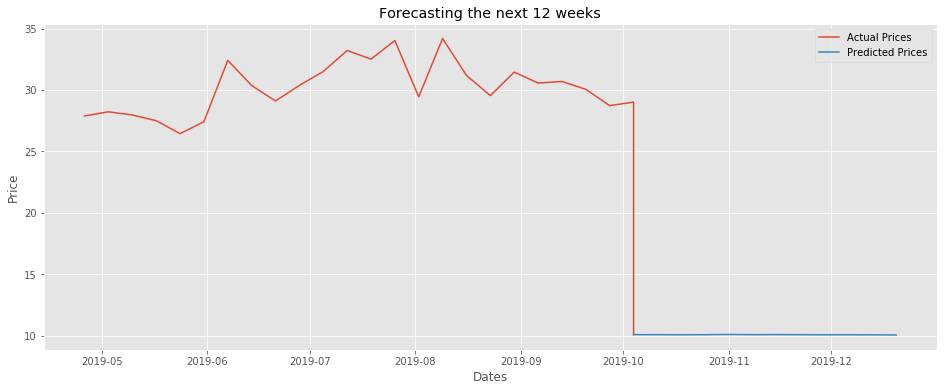

In [47]:
# Predicting off of y because it contains the most recent dates
yhat = model.predict(np.array(df.tail(n_per_in)).reshape(1, n_per_in, n_features)).tolist()[0]
print("Predicted Prices:\n",yhat)

# Creating a DF of the predicted prices
preds = pd.DataFrame(yhat, index=pd.date_range(start=df.index[-1], periods=len(yhat), freq="1W-FRI"))

# Number of periods back to visualize the actual values
pers = 24

# Plotting
plt.figure(figsize=(16,6))
plt.plot(df.Close.tail(pers).append(preds.head(1)), label="Actual Prices")
plt.plot(preds, label="Predicted Prices")
plt.ylabel("Price")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(yhat)} weeks")
plt.legend()
plt.show()